#  导入依赖

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
# import torch

import warnings

warnings.filterwarnings(action="ignore")
warnings.simplefilter(action="ignore")

In [12]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image

# 可视化相关设置

In [23]:
plt.rcParams["figure.figsize"] = [3.0, 3.0]
img = cv2.imread(filename="images/puppies.jpg")
img = cv2.resize(src=img, dsize=(640, 640))
rgb_img = img.copy()
# rgb_img = torch.from_numpy(rgb_img).permute(2, 0, 1).float()
img = np.float32(img) / 255

# 定义要处理的模型(YOLOv8n目标检测模型)

In [17]:
yolo = YOLO(model='yolov8n.pt') 
yolo = yolo.cpu()

选择要处理的层

In [18]:
yolo.info(detailed=True)

layer                                    name                type  gradient  parameters               shape        mu     sigma
    0                     model.0.conv.weight              Conv2d     False         432       [16, 3, 3, 3]  -0.00279     0.152        float32
    1                       model.0.bn.weight         BatchNorm2d     False          16                [16]      2.97      1.86        float32
    1                         model.0.bn.bias         BatchNorm2d     False          16                [16]     0.249      4.17        float32
    2                             model.0.act                SiLU     False           0                  []         -         -              -
    3                     model.1.conv.weight              Conv2d     False        4608      [32, 16, 3, 3]  -0.00012     0.063        float32
    4                       model.1.bn.weight         BatchNorm2d     False          32                [32]      5.02      1.12        float32
    4         

(129, 3157200, 0, 8.8575488)

选择要进行CAM操作的目标层,暂时只检查backbone

In [27]:
yolo_nn = yolo.model.model
layer_map = {
    # 如果要选择其他c2f输出,只需要更改这个字典
    "backbone": [
        ("c2f1", 2),
        ("c2f2", 4),
        ("c2f3", 6),
        ("c2f4", 8),
        ("c2f5", 12),	
	],
    "neck": []
}
backbone_layers = {layer: yolo_nn[idx] for layer, idx in layer_map["backbone"]}

### You may get an innaccurate output at first (If it's running on GPU)

In [30]:
def show_cam_result(
    model, input_tensor, part_of_model, chosen_layers=[], task="od"
) -> None:
    # all_layers is a dict, but target_layers must be list
    target_layers = [part_of_model[layer_name] for layer_name in chosen_layers]
    cam = EigenCAM(model=model, target_layers=target_layers, task=task)
    grayscale_cam = cam(input_tensor=input_tensor)[0, :, :]
    cam_image = show_cam_on_image(img=img, mask=grayscale_cam, use_rgb=True)  # type: ignore
    plt.imshow(X=cam_image)
    plt.show()


0: 640x640 7 dogs, 265.4ms
Speed: 12.3ms preprocess, 265.4ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)


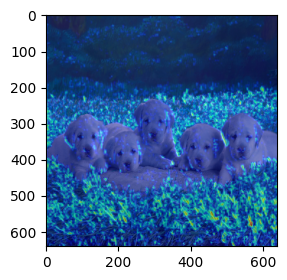

In [32]:
show_cam_result(model=yolo, input_tensor=rgb_img, part_of_model=backbone_layers, chosen_layers=["c2f1"])


0: 640x640 7 dogs, 236.4ms
Speed: 4.0ms preprocess, 236.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


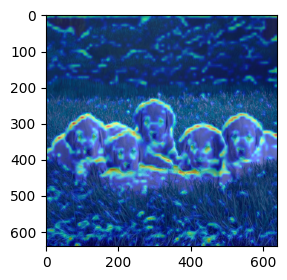

In [33]:
show_cam_result(model=yolo, input_tensor=rgb_img, part_of_model=backbone_layers, chosen_layers=["c2f2"])


0: 640x640 7 dogs, 248.6ms
Speed: 2.7ms preprocess, 248.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


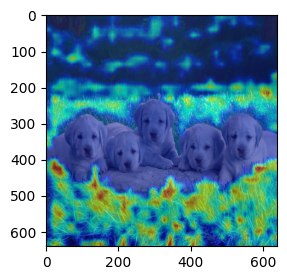

In [34]:
show_cam_result(model=yolo, input_tensor=rgb_img, part_of_model=backbone_layers, chosen_layers=["c2f3"])


0: 640x640 7 dogs, 228.6ms
Speed: 2.6ms preprocess, 228.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


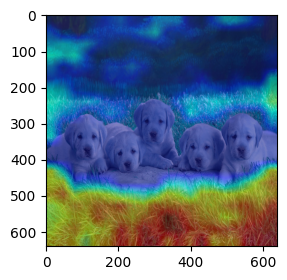

In [35]:
show_cam_result(model=yolo, input_tensor=rgb_img, part_of_model=backbone_layers, chosen_layers=["c2f4"])


0: 640x640 7 dogs, 234.8ms
Speed: 4.7ms preprocess, 234.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


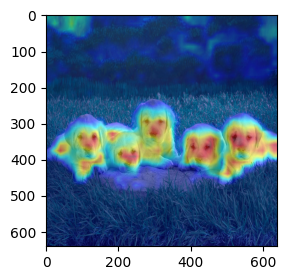

In [36]:
show_cam_result(model=yolo, input_tensor=rgb_img, part_of_model=backbone_layers, chosen_layers=["c2f5"])